<a href="https://colab.research.google.com/github/deepankan-rai/ELTASK1DataCleaningProcessing/blob/main/DataCleaningProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
file_path= "/content/Titanic-Dataset.csv.xls"
df= pd.read_csv(file_path)

In [8]:
print(df.info())
print("\nMissng Values per column:\n",df.isnull().sum())
print("\nFirst 5 rows:\n",df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 69.7+ KB
None

Missng Values per column:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

First 5 rows:
    PassengerId  Survived  Pclass  Sex  ...     Parch      Fare    Cabin  Embarked
0            1

In [9]:
df.fillna({'Age':df['Age'].median()},inplace=True)
df.fillna({'Embarked':df['Embarked'].mode()},inplace=True)
df.fillna({'Cabin':'Missing'},inplace=True)
print("\nMissing values after filling:\n",df.isnull().sum())


Missing values after filling:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df.drop(['Name','Ticket'],axis=1,inplace=True)
print("\nEncoded columns:",df.head())


Encoded columns:    PassengerId  Survived  Pclass  Sex  ...     Parch      Fare    Cabin  Embarked
0            1         0       3  NaN  ... -0.473674 -0.502445  Missing         2
1            2         1       1  NaN  ... -0.473674  0.786845      C85         0
2            3         1       3  NaN  ... -0.473674 -0.488854  Missing         2
3            4         1       1  NaN  ... -0.473674  0.420730     C123         2
4            5         0       3  NaN  ... -0.473674 -0.486337  Missing         2

[5 rows x 10 columns]


In [13]:
scaler=StandardScaler()
num_cols = ['Age','Fare','SibSp','Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\nStandardized numerical columns:\n",df[num_cols].head())


Standardized numerical columns:
         Age      Fare     SibSp     Parch
0 -0.565736 -0.502445  0.432793 -0.473674
1  0.663861  0.786845  0.432793 -0.473674
2 -0.258337 -0.488854 -0.474545 -0.473674
3  0.433312  0.420730  0.432793 -0.473674
4  0.433312 -0.486337 -0.474545 -0.473674


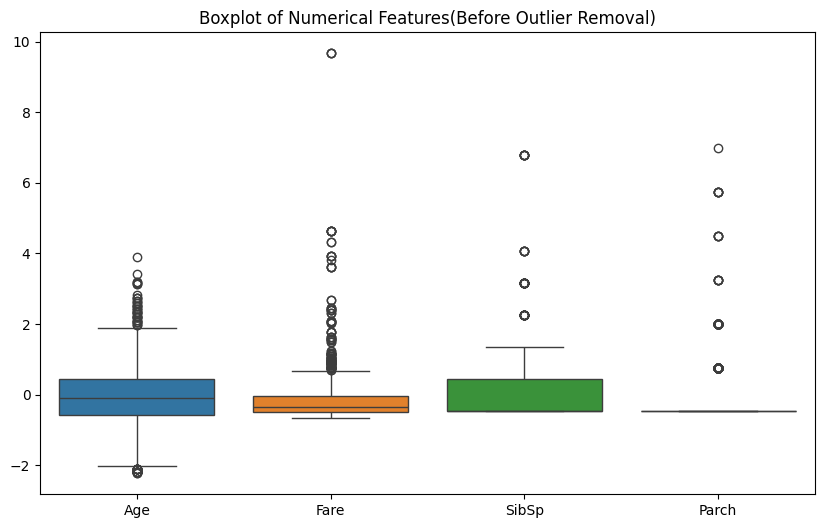

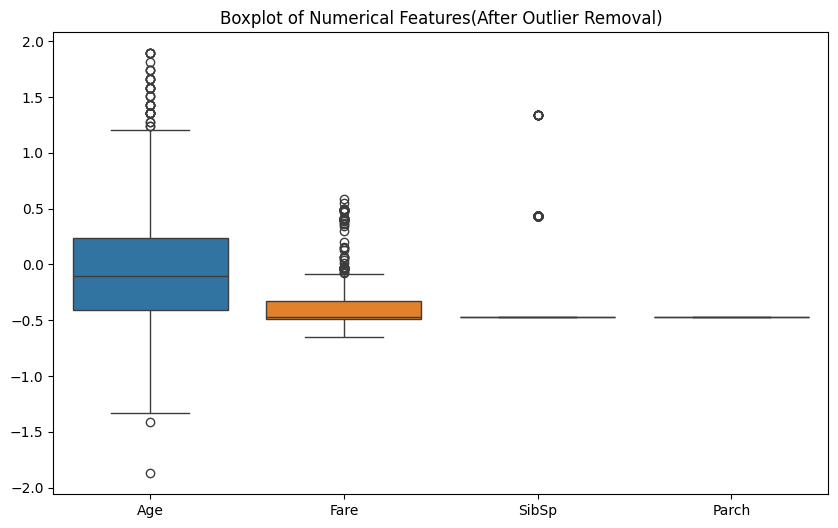

Shape before outlier removal: (891, 10)
Shape after outlier removal: (577, 10)


In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numerical Features(Before Outlier Removal)")
plt.show()
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[num_cols] < (Q1-1.5*IQR)) | (df[num_cols] > (Q3+1.5*IQR))).any(axis=1)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned[num_cols])
plt.title("Boxplot of Numerical Features(After Outlier Removal)")
plt.show()

print(f"Shape before outlier removal: {df.shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

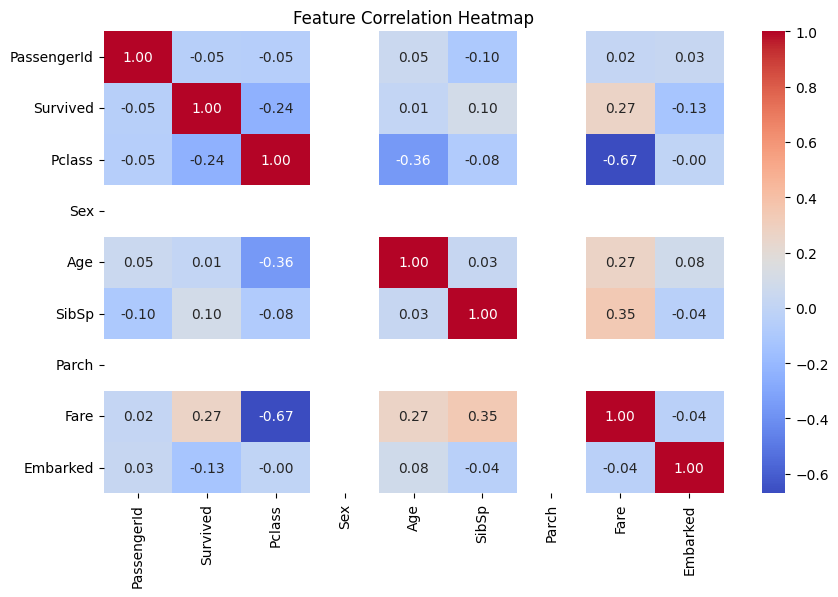


Cleaned dataset saved as Titanic-Cleaned.csv


In [18]:
df_cleaned_numeric = df_cleaned.drop('Cabin', axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

df_cleaned.to_csv("/content/Titanic-Cleaned.csv", index=False)
print("\nCleaned dataset saved as Titanic-Cleaned.csv")